In [21]:
import torch

import numpy as np

import matplotlib.pyplot as plt

import torch.nn as nn

In [22]:
# Step 1: Create XOR Dataset

X = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]], dtype=torch.float32)

y = torch.tensor([[0.0], [1.0], [1.0], [0.0]], dtype=torch.float32)

In [23]:
# Step 2: Define a simple Neural Network with 1 hidden layer

class XORNetwork(nn.Module):

    def __init__(self):
        super(XORNetwork,self).__init__()

        # 2 input features -> 4 neurons in hidden layer -> 1 output

        self.fc1 = nn.Linear(2, 4)  # Input layer (2 features) to hidden layer (4 neurons)

        self.fc2 = nn.Linear(4, 1)  # Hidden layer (4 neurons) to output layer (1 neuron)

        self.sigmoid = nn.Sigmoid() # Activation function for output layer

    def forward(self,x):

        x = torch.relu(self.fc1(x)) # ReLU activation for hidden layer

        x = self.sigmoid(self.fc2(x)) # Sigmoid activation for output

        return x

In [24]:
# Step 3: Instantiate the model

model = XORNetwork()

In [25]:


loss_fn = nn.BCELoss()  # Binary Cross Entropy for classification

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [26]:
# Step 5: Train the model using backpropagation

epochs = 10000 # Number of training iterations

for epoch in range(epochs):

        # Forward pass: Compute predicted y by passing X to the model

        predictions = model(X)

        # Compute the loss (error)

        loss = loss_fn(predictions, y)

        # Zero the gradients before backward pass

        optimizer.zero_grad()

        # Backward pass: Compute gradients

        loss.backward()

        # Update weights and biases using gradient descent

        optimizer.step()

        # Print loss every 1000 epochs to monitor progress

        if epoch % 1000 == 0:
                
                    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

Epoch 1/10000, Loss: 0.7173252105712891
Epoch 1001/10000, Loss: 0.6931480169296265
Epoch 2001/10000, Loss: 0.6931474208831787
Epoch 3001/10000, Loss: 0.6931473016738892
Epoch 4001/10000, Loss: 0.6931473016738892
Epoch 5001/10000, Loss: 0.6931471228599548
Epoch 6001/10000, Loss: 0.6931471824645996
Epoch 7001/10000, Loss: 0.6931471824645996
Epoch 8001/10000, Loss: 0.6931471824645996
Epoch 9001/10000, Loss: 0.6931472420692444


In [27]:
# Create a dense grid of points

x1_vals = np.linspace(-0.2,1.2,100)

x2_vals = np.linspace(-0.2,1.2,100)

xx, yy = np.meshgrid(x1_vals, x2_vals)

grid = np.c_[xx.ravel(), yy.ravel()]

In [28]:
# Convert to PyTorch tensor

grid_tensor = torch.tensor(grid, dtype=torch.float32)

In [29]:
# Get final predictions

with torch.no_grad():
    final_predictions = model(X)

# Print the predictions

print("\nFinal Predictions:")

for i in range(len(X)):
    
    print(f"Input {X[i].tolist()} → Prediction: {round(final_predictions[i].item())}")



Final Predictions:
Input [0.0, 0.0] → Prediction: 0
Input [0.0, 1.0] → Prediction: 0
Input [1.0, 0.0] → Prediction: 1
Input [1.0, 1.0] → Prediction: 1


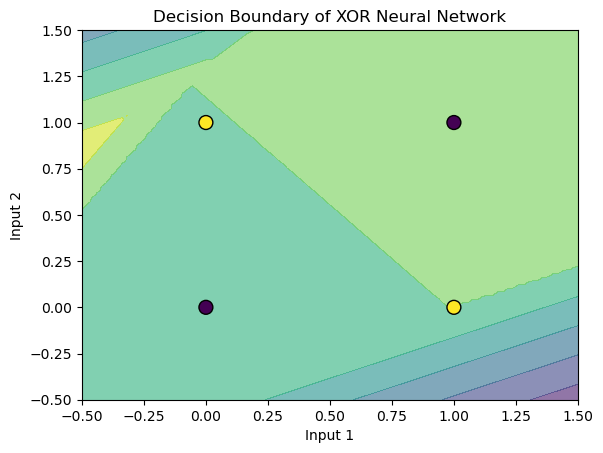

In [30]:
# Create a mesh grid for plotting

x_min, x_max = -0.5, 1.5

y_min, y_max = -0.5, 1.5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

grid_tensor = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Get predictions for the entire grid

with torch.no_grad():

    preds = model(grid_tensor)

    preds = preds.reshape(xx.shape)  # Reshape for plotting

# Plot decision boundary
plt.contourf(xx, yy, preds, alpha=0.6)

plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], edgecolors='k', marker='o', s=100)

plt.title("Decision Boundary of XOR Neural Network")

plt.xlabel("Input 1")

plt.ylabel("Input 2")

plt.show()
